In [61]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [30]:
# from https://grafana.icecube.wisc.edu/grafana/d/45z6Oy5Gk/glidein-sites?orgId=1
sites = {}
for row in """US-NPX: 46.05 Mil
other: 16.48 Mil
DE-DESY: 11.05 Mil
US-MSU: 10.05 Mil
CA-SFU: 9.21 Mil
US-OSG-UCSD: 3.70 Mil
US-XSEDE-PSC: 2.83 Mil
US-LCC-TACC: 1.82 Mil
US-OSG-Syracuse: 1.23 Mil
US-XSEDE-SDSC: 1.14 Mil
DE-Mainz: 914.13 K
US-GZK: 873.50 K
US-UMD: 809.25 K
US-OSG-Crane: 731.15 K
BE-IIHE: 608.60 K
DE-Dortmund: 517.12 K
US-XSEDE-TACC: 478.52 K
US-Marquette: 453.19 K
CA-Alberta: 416.41 K
US-OSG-FNAL: 384.63 K
US-OSG-BNL-ATLAS: 316.14 K
DE-Aachen: 281.38 K
US-CHTC: 255.49 K
UK-Manchester: 168.31 K
US-OSG-SPRACE: 159.44 K
US-OSG-MWT2: 144.66 K
US-OSG-Colorado: 142.58 K
US-OSG-UCSDT2: 141.05 K
DK-NBI: 122.27 K
DE-Munich: 76.82 K
US-OSG-UIUC: 49.16 K
US-OSG-Clemson: 34.97 K
US-OSG-NMSU: 33.95 K
US-OSG-WSU: 20.31 K
US-OSG-UConn: 6.52 K
US-OSG-Caltech-HEP: 3.59 K
CA-McGill: 54.00""".split('\n'):
    parts = row.split(':')
    val = parts[1]
    if 'Mil' in val:
        val = float(val.split()[0])*1000000
    elif 'K' in val:
        val = float(val.split()[0])*1000
    else:
        val = float(val)
    sites[parts[0]] = val
sites

{'US-NPX': 46050000.0,
 'other': 16480000.0,
 'DE-DESY': 11050000.0,
 'US-MSU': 10050000.0,
 'CA-SFU': 9210000.0,
 'US-OSG-UCSD': 3700000.0,
 'US-XSEDE-PSC': 2830000.0,
 'US-LCC-TACC': 1820000.0,
 'US-OSG-Syracuse': 1230000.0,
 'US-XSEDE-SDSC': 1140000.0,
 'DE-Mainz': 914130.0,
 'US-GZK': 873500.0,
 'US-UMD': 809250.0,
 'US-OSG-Crane': 731150.0,
 'BE-IIHE': 608600.0,
 'DE-Dortmund': 517120.0,
 'US-XSEDE-TACC': 478520.0,
 'US-Marquette': 453190.0,
 'CA-Alberta': 416410.0,
 'US-OSG-FNAL': 384630.0,
 'US-OSG-BNL-ATLAS': 316140.0,
 'DE-Aachen': 281380.0,
 'US-CHTC': 255490.0,
 'UK-Manchester': 168310.0,
 'US-OSG-SPRACE': 159440.0,
 'US-OSG-MWT2': 144660.0,
 'US-OSG-Colorado': 142580.0,
 'US-OSG-UCSDT2': 141050.0,
 'DK-NBI': 122270.0,
 'DE-Munich': 76820.0,
 'US-OSG-UIUC': 49160.0,
 'US-OSG-Clemson': 34970.0,
 'US-OSG-NMSU': 33950.0,
 'US-OSG-WSU': 20310.0,
 'US-OSG-UConn': 6520.0,
 'US-OSG-Caltech-HEP': 3590.0,
 'CA-McGill': 54.0}

In [92]:
sites = {'CA-Alberta': {'count': 416410, 'lat': 53.5461, 'lon': -113.4938},
 'US-NPX': {'count': 46050000.0, 'lat': 43.0766, 'lon': -89.4125},
 'DE-DESY': {'count': 11050000.0, 'lat': 52.3477, 'lon': 13.6208},
 'US-MSU': {'count': 10050000.0, 'lat': 42.7018, 'lon': -84.4822},
 'CA-SFU': {'count': 9210000.0, 'lat': 49.2768, 'lon': -122.9180},
 'US-OSG-UCSD': {'count': 3700000.0, 'lat': 32.8801, 'lon': -117.2340},
 'US-XSEDE-PSC': {'count': 2830000.0, 'lat': 40.4406, 'lon': -79.9959},
 'US-LCC-TACC': {'count': 1820000.0, 'lat': 30.3877, 'lon': -97.7280},
 'US-OSG-Syracuse': {'count': 1230000.0, 'lat': 43.0481, 'lon': -76.1474},
 'US-XSEDE-SDSC': {'count': 1140000.0, 'lat': 32.8801, 'lon': -117.2340},
 'DE-Mainz': {'count': 914130.0, 'lat': 49.9929, 'lon': 8.2473},
 'US-GZK': {'count': 873500.0, 'lat': 43.0766, 'lon': -89.4125},
 'US-UMD': {'count': 809250.0, 'lat': 38.9869, 'lon': -76.9426},
 'US-OSG-Crane': {'count': 731150.0, 'lat': 40.8202, 'lon': -96.7005},
 'BE-IIHE': {'count': 608600.0, 'lat': 50.8503, 'lon': 4.3517},
 'DE-Dortmund': {'count': 517120.0, 'lat': 51.5136, 'lon': 7.4653},
 'US-XSEDE-TACC': {'count': 478520.0, 'lat': 30.3877, 'lon': -97.7280},
 'US-Marquette': {'count': 453190.0, 'lat': 43.0388, 'lon': -87.9286},
 'US-OSG-FNAL': {'count': 384630.0, 'lat': 41.8407, 'lon': -88.2792},
 'US-OSG-BNL-ATLAS': {'count': 316140.0, 'lat': 40.8643, 'lon': -72.8752},
 'DE-Aachen': {'count': 281380.0, 'lat': 50.7753, 'lon': 6.0839},
 'US-CHTC': {'count': 255490.0, 'lat': 43.0766, 'lon': -89.4125},
 'UK-Manchester': {'count': 168310.0, 'lat': 53.4668, 'lon': -2.2339},
 'US-OSG-SPRACE': {'count': 159440.0, 'lat': -23.511344, 'lon': -46.66769},
 'US-OSG-MWT2': {'count': 144660.0, 'lat': 39.7671, 'lon': -86.1581},
 'US-OSG-Colorado': {'count': 142580.0, 'lat': 40.0076, 'lon': -105.2659},
 'US-OSG-UCSDT2': {'count': 141050.0, 'lat': 32.8801, 'lon': -117.2340},
 'DK-NBI': {'count': 122270.0, 'lat': 55.676098, 'lon': 12.568337},
 'DE-Munich': {'count': 76820.0, 'lat': 48.1351, 'lon': 11.5820},
 'US-OSG-UIUC': {'count': 49160.0, 'lat': 40.1020, 'lon': -88.2272},
 'US-OSG-Clemson': {'count': 34970.0, 'lat': 34.6834, 'lon': -82.8374},
 'US-OSG-NMSU': {'count': 33950.0, 'lat': 32.2788, 'lon': -106.7479},
 'US-OSG-WSU': {'count': 20310.0, 'lat': 46.7319, 'lon': -117.1542},
 'US-OSG-UConn': {'count': 6520.0, 'lat': 41.8077, 'lon': -72.2540},
 'US-OSG-Caltech-HEP': {'count': 3590.0, 'lat': 34.1377, 'lon': -118.1253},
 'CA-McGill': {'count': 54.0, 'lat': 45.5048, 'lon': -73.5772},
 'US-NERSC': {'count': 17500, 'lat': 37.8758, 'lon': -122.2528}
}

for row in """us-east-1;Virginia;38.13;-78.45
 us-east-2;Ohio;39.96;-83
 us-west-1;California;37.35;-121.96
 us-west-2;Oregon;46.15;-123.88
 eu-west-1;Ireland;53;-8
 eu-west-2;London;51;-0.1
 eu-west-3;Paris;48.86;2.35
 eu-central-1;Frankfurt;50;8
 sa-east-1;Sao Paulo;-23.34;-46.38
 ap-southeast-1;Singapore;1.37;103.8
 ap-southeast-2;Sydney;-33.86;151.2
 ap-northeast-1;Tokyo;35.41;139.42
 ap-northeast-2;Seoul;37.56;126.98
 ap-south-1;Mumbai;19.08;72.88
 ca-central-1;Canada Central;45.5;-73.6""".split('\n'):
    if ';' not in row:
        continue
    parts = row.strip().split(';')
    sites['AWS-'+parts[0]] = {'count':1, 'lat': float(parts[2]), 'lon': float(parts[3])}

for i,row in enumerate("""40.758701, -111.876183
36.114647, -115.172813
41.2619, -95.8608
33.1960, -80.0131
60.5693, 27.1878
34.6937, 135.5023
-6.2088, 106.8456
-35.2809, 149.1300
53.3498, 6.2603
""".split('\n')):
    if ',' not in row:
        continue
    parts = row.strip().split(',')
    sites[f'GOOGLE-{i}'] = {'count': 1, 'lat': float(parts[0]), 'lon': float(parts[1].strip())}
    
pairs = {}
for site in sites:
    latlon = (sites[site]['lat'], sites[site]['lon'])
    if latlon not in pairs:
        pairs[latlon] = {site: sites[site]['count']}
    else:
        pairs[latlon][site] = sites[site]['count']

In [93]:
def iscloud(names):
    for n in names:
        if n.startswith('AWS') or n.startswith('GOOGLE') or n.startswith('AZURE'):
            return True
    return False

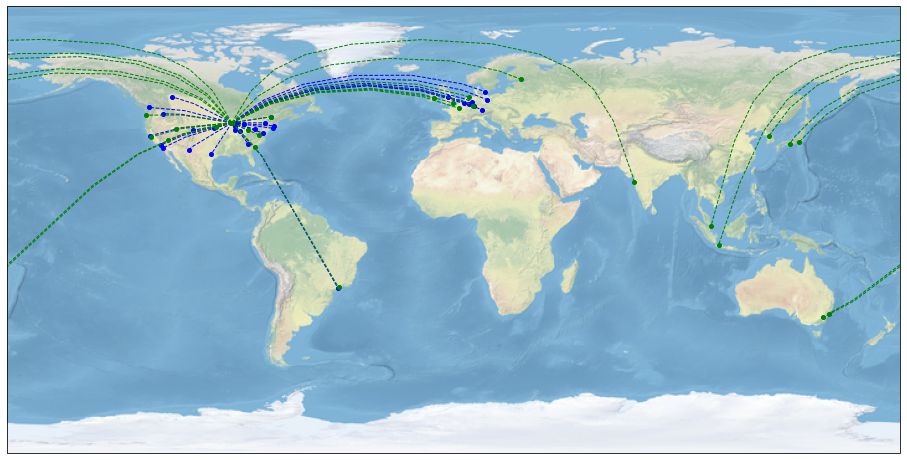

In [94]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.coastlines()

uw_lat = 43.0766
uw_lon = -89.4125

totalcount = sum(sum(s.values()) for s in pairs.values())

for latlon in pairs:
    weight = min(10,max(int(math.log(sum(pairs[latlon].values())/totalcount*800*len(pairs))), 1))
    color = 'green' if iscloud(pairs[latlon]) else 'blue'
    plt.plot([uw_lon, latlon[1]], [uw_lat, latlon[0]],
             color=color, linestyle='--', marker='o', linewidth=1, markersize=4,
             transform=ccrs.Geodetic(),
             )

#plt.text(ny_lon - 3, ny_lat - 12, 'New York',
#         horizontalalignment='right',
#         transform=ccrs.Geodetic())

plt.show()

In [68]:
totalcount = sum(sum(s.values()) for s in pairs.values())

for latlon in pairs:
    weight = min(10,max(int(math.log(sum(pairs[latlon].values())/totalcount*800*len(pairs))), 1))
    print(list(pairs[latlon].keys())[0], 'count:', sum(pairs[latlon].values()), 'weight:', weight)
print('total', totalcount)

CA-Alberta count: 416410 weight: 4
US-NPX count: 47178990.0 weight: 9
DE-DESY count: 11050000.0 weight: 7
US-MSU count: 10050000.0 weight: 7
CA-SFU count: 9210000.0 weight: 7
US-OSG-UCSD count: 4981050.0 weight: 7
US-XSEDE-PSC count: 2830000.0 weight: 6
US-LCC-TACC count: 2298520.0 weight: 6
US-OSG-Syracuse count: 1230000.0 weight: 5
DE-Mainz count: 914130.0 weight: 5
US-UMD count: 809250.0 weight: 5
US-OSG-Crane count: 731150.0 weight: 5
BE-IIHE count: 608600.0 weight: 5
DE-Dortmund count: 517120.0 weight: 4
US-Marquette count: 453190.0 weight: 4
US-OSG-FNAL count: 384630.0 weight: 4
US-OSG-BNL-ATLAS count: 316140.0 weight: 4
DE-Aachen count: 281380.0 weight: 4
UK-Manchester count: 168310.0 weight: 3
US-OSG-SPRACE count: 159440.0 weight: 3
US-OSG-MWT2 count: 144660.0 weight: 3
US-OSG-Colorado count: 142580.0 weight: 3
DK-NBI count: 122270.0 weight: 3
DE-Munich count: 76820.0 weight: 2
US-OSG-UIUC count: 49160.0 weight: 2
US-OSG-Clemson count: 34970.0 weight: 2
US-OSG-NMSU count: 33950